<a href="https://colab.research.google.com/github/nauhrsouza/Gradiente-projetado/blob/main/gradiente_conjugado_quadratico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import sympy as sp
x, y, t = sp.symbols('x y t')
sp.init_printing(use_unicode=True)

def funcao(x):
    return -12*x[1] + 4 * x[0]**2  + 4 * x[0]**2+4*x[0]*x[1]

def gradiente(x):
    return [8*x[0]+4*x[1], 8*x[1]+4*x[0] -12]

def hessiana(x):
  return [[8,4],[4,8]]

def funcao1(x):
    return x[0]**2 + 4 * x[0] * x[1] + 6 *x[1]**2

def gradiente1(x):
    return [2*x[0]+4*x[1], 4*x[0] + 12*x[1]]

def hessiana1(x):
  return [[2,4],[4,12]]


#Método gradiente conjugado caso quadrático.

com $t_k$ calculado pela fórmula fechada
$t_k = -\frac{\nabla f(x^k)^{T} d^{k}}{(d^{k})^{T}Ad^{k}}$ e
$\beta_k=\frac{(d^{k})^{T}A\nabla f(x^{x+1})}{(d^{k})^{T}Ad^{k}}.$

In [8]:
from os import X_OK
from math import*
import matplotlib.pyplot as plt
import numpy as np
eps = 10**(-5)  # valor de epsilon
rho = 1
bMax = 10**8  # números máximo de iterações de b
theta1 = (3-sqrt(5))/2
theta2 = 1-theta1
k = 0
kMax = 1000  # números máximo de iterações de k

valores_da_f = []  # lista com os valores da f
valores_da_norma = []  # lista com os valores da norma
valores_de_k = []  # lista com os valores da norma
valores_de_x_k = []  # lista com os valores de x_k
valores_de_d_k = []  # lista com os valores de d_k

# Ponto inicial
x = eval(input("Digite o ponto inicial: "))
x_k = x

# Direção inicial
d_0 = np.dot(-1, gradiente1(x_k))
d_k = d_0

# Norma do gradiente
norma=sqrt(np.dot(gradiente1(x_k),gradiente1(x_k)))

valores_de_d_k.append(d_k) # guarda os valores de d_k
valores_da_f.append(funcao1(x_k))  # guarda os valores da f em x_k
valores_da_norma.append(norma)  # guarda os valores da norma em x_k
valores_de_k.append(k)  # guarda os valores de k
valores_de_x_k.append(x_k) # guarda os valores de x_k


print(f'{k} || {0} || {round(funcao1(x_k), 6)} || {round(norma,6)} || {x_k} || {d_k}')

while norma>eps and k < kMax:

    # t_k calculado pela formula fechada definida acima.
    t_k=-np.dot(gradiente1(x_k),d_k)/np.dot(d_k,np.dot(hessiana1(x_k),d_k))

    # atualização do x
    x_k = x_k + np.dot(t_k, d_k)

    # guarda os valores de x_k
    valores_de_x_k.append(x_k)

    #beta_k calculada pela formula definida acima.
    beta_k=np.dot(d_k,np.dot(hessiana1(x_k),gradiente1(x_k)))/np.dot(d_k,np.dot(hessiana1(x_k),d_k))

    # calculando a nova direção
    d_k = np.dot(-1, gradiente1(x_k)) + np.dot(beta_k,d_k)

    # calculando a norma do gradiente
    norma=sqrt(np.dot(gradiente1(x_k),gradiente1(x_k)))

    # guarda os valores da f em x_k
    valores_da_f.append(funcao1(x_k))

    # guarda os valores da norma em x_k
    valores_da_norma.append(norma)

    # guarda os valores de d_k
    valores_de_d_k.append(d_k)

    # atualiza o valor de k
    k = k + 1

    # guarda os valores de k
    valores_de_k.append(k)

    print(f'{k} || {round(t_k,3)} || {round(funcao1(x_k), 6)} || {round(norma,6)} || {x_k} || {d_k}')


Digite o ponto inicial: 1,2
0 || 0 || 33 || 29.732137 || (1, 2) || [-10 -28]
1 || 0.075 || 0.021607 || 0.160606 || [ 0.25388251 -0.08912897] || [-0.15154095  0.05320054]
2 || 1.675 || 0.0 || 0.0 || [5.55111512e-17 1.52655666e-16] || [-7.32214949e-16 -2.05020186e-15]


In [ ]:
# plotando os gráfico da f(x) e da norma.
plt.title('Valores de K x Valores da f(x)')

plt.plot(valores_de_k,valores_da_f)
plt.xlabel('Valores de K')
plt.ylabel('Valores da f(x)')
plt.scatter(valores_de_k, valores_da_f, color='red')
plt.show()

plt.title('Valores de K x Valores da norma')
plt.plot(valores_de_k,valores_da_norma, color="red")
plt.xlabel('Valores de K')
plt.ylabel('Valores da norma')
plt.scatter(valores_de_k, valores_da_norma, color='blue')
plt.show()

plt.title('valores de x_k')
x=[]
y=[]
for i in valores_de_x_k:
  x.append(i[0])
  y.append(i[1])

plt.plot(x,y,color="green")
plt.scatter(x, y, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.title('valores de x_k')
dx=[]
dy=[]
for i in valores_de_d_k:
  dx.append(i[0])
  dy.append(i[1])
#plt.subplot(1,2,1)
plt.plot(dx,dy,color="red")
plt.scatter(dx,dy, color='blue')
plt.xlabel('dx')
plt.ylabel('dy')
plt.show()



#Método gradiente conjugado caso quadrático.

com $t_k$ calculado pela fórmula fechada
$t_k$ pela minimização da $\varphi (t)=f(x^k +td^k)$ e
$\beta_k=\frac{(d^{k})^{T}A\nabla f(x^{x+1})}{(d^{k})^{T}Ad^{k}}.$

In [ ]:
from math import*
import matplotlib.pyplot as plt
import numpy as np
eps = 10**(-5)  # valor de epsilon
rho = 1
bMax = 10**8  # números máximo de iterações de b
theta1 = (3-sqrt(5))/2
theta2 = 1-theta1
k = 0
kMax = 1000  # números máximo de iterações de k

valores_da_f = []  # lista com os valores da f
valores_da_norma = []  # lista com os valores da norma
valores_de_k = []  # lista com os valores da norma
valores_de_x_k = []  # lista com os valores de x_k
valores_de_d_k = []  # lista com os valores de d_k

# Ponto inicial
x = eval(input("Digite o ponto inicial: "))
x_k = x

# Direção inicial
d_0 = np.dot(-1, gradiente(x_k[0], x_k[1]))
d_k = d_0

# Norma do gradiente
norma=sqrt(np.dot(gradiente(x_k[0], x_k[1]),gradiente(x_k[0], x_k[1])))

valores_de_d_k.append(d_k) # guarda os valores de d_k
valores_da_f.append(funcao(x_k[0], x_k[1]))  # guarda os valores da f em x_k
valores_da_norma.append(norma)  # guarda os valores da norma em x_k
valores_de_k.append(k)  # guarda os valores de k
valores_de_x_k.append(x_k) # guarda os valores de x_k


print(f'{k} || {0} || {round(funcao(x_k[0], x_k[1]), 6)} || {round(norma,6)} || {x_k} || {d_k}')
#eq=sp.Eq(np.dot(gradiente(x_k[0]+np.dot(t,d_k[0]),x_k[1]+np.dot(t,d_k[1])),d_k),0)
#t_k=float(sp.solve(eq,t)[0])
while norma>eps and k < kMax:

    # t_k calculado pela formula fechada definida acima.
    #t_k=-np.dot(gradiente(x_k[0],x_k[1]),d_k)/np.dot(d_k,np.dot(hessiana(x_k[0], x_k[1]),d_k))
    eq=sp.Eq(np.dot(gradiente(x_k[0]+np.dot(t,d_k[0]),x_k[1]+np.dot(t,d_k[1])),d_k),0)
    t_k=float(sp.solve(eq,t)[0])
    # atualização do x
    x_k = x_k + np.dot(t_k, d_k)

    # guarda os valores de x_k
    valores_de_x_k.append(x_k)

    #beta_k calculada pela formula definida acima.
    beta_k=np.dot(d_k,np.dot(hessiana(x_k[0],x_k[1]),gradiente(x_k[0],x_k[1])))/np.dot(d_k,np.dot(hessiana(x_k[0], x_k[1]),d_k))

    # calculando a nova direção
    d_k = np.dot(-1, gradiente(x_k[0], x_k[1])) + np.dot(beta_k,d_k)

    # calculando a norma do gradiente
    norma=sqrt(np.dot(gradiente(x_k[0], x_k[1]),gradiente(x_k[0], x_k[1])))

    # guarda os valores da f em x_k
    valores_da_f.append(funcao(x_k[0], x_k[1]))

    # guarda os valores da norma em x_k
    valores_da_norma.append(norma)

    # guarda os valores de d_k
    valores_de_d_k.append(d_k)

    # atualiza o valor de k
    k = k + 1

    # guarda os valores de k
    valores_de_k.append(k)

    print(f'{k} || {round(t_k,3)} || {round(funcao(x_k[0], x_k[1]), 6)} || {round(norma,6)} || {x_k} || {d_k}')


Digite o ponto inicial: -0.5,1
0 || 0 || -9.0 || 6.0 || (-0.5, 1) || [0. 6.]
1 || 0.125 || -11.25 || 3.0 || [-0.5   1.75] || [-3.   1.5]
2 || 0.167 || -12.0 || 0.0 || [-1.  2.] || [0. 0.]


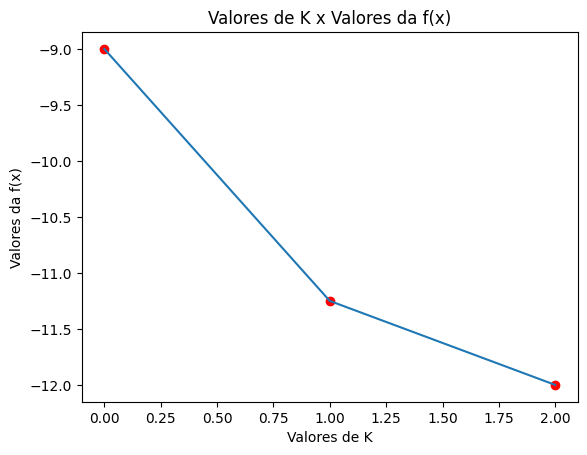

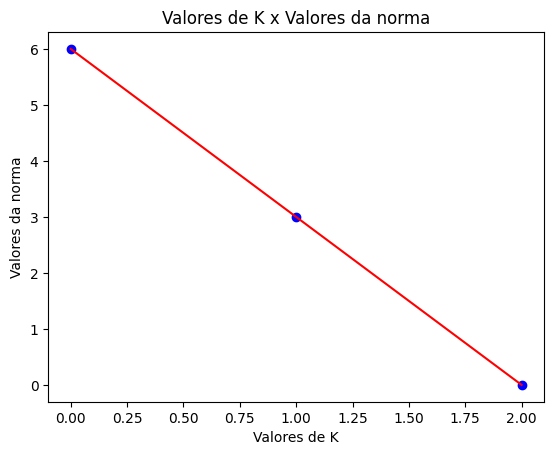

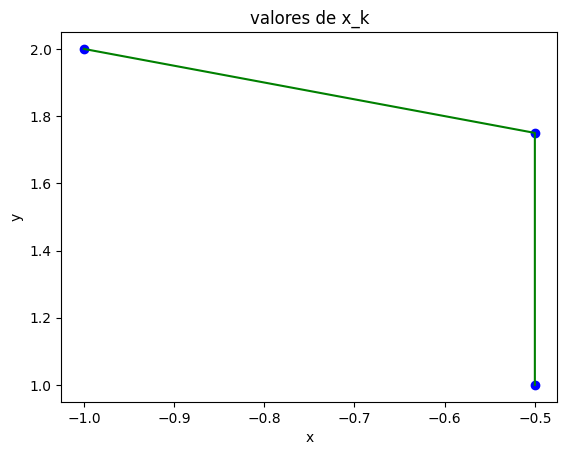

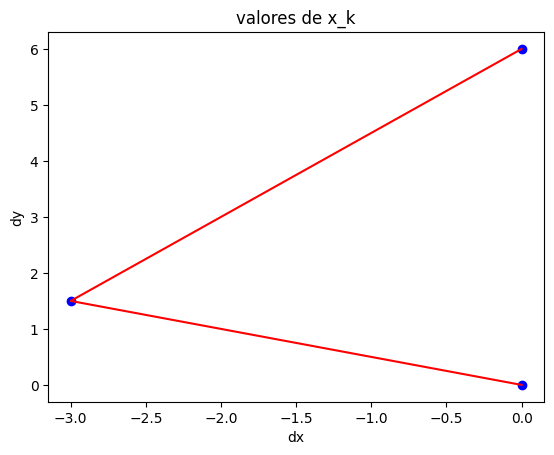

In [ ]:
# plotando os gráfico da f(x) e da norma.
plt.title('Valores de K x Valores da f(x)')

plt.plot(valores_de_k,valores_da_f)
plt.xlabel('Valores de K')
plt.ylabel('Valores da f(x)')
plt.scatter(valores_de_k, valores_da_f, color='red')
plt.show()

plt.title('Valores de K x Valores da norma')
plt.plot(valores_de_k,valores_da_norma, color="red")
plt.xlabel('Valores de K')
plt.ylabel('Valores da norma')
plt.scatter(valores_de_k, valores_da_norma, color='blue')
plt.show()

plt.title('valores de x_k')
x=[]
y=[]
for i in valores_de_x_k:
  x.append(i[0])
  y.append(i[1])

plt.plot(x,y,color="green")
plt.scatter(x, y, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.title('valores de x_k')
dx=[]
dy=[]
for i in valores_de_d_k:
  dx.append(i[0])
  dy.append(i[1])
#plt.subplot(1,2,1)
plt.plot(dx,dy,color="red")
plt.scatter(dx,dy, color='blue')
plt.xlabel('dx')
plt.ylabel('dy')
plt.show()
